Project 1 Python Notebook.

Konrad Gomez-Haibach, Andrew Salls & Cooper Dean

This was run using google colaboratory.  To run it, go to https://colab.research.google.com/ and click "Upload" on the left.  Upload the attatched .ipynb file.  When the file is open, press the file tab on the left side and drag the "math_course_dataCleaned.xlsx" file into the Files section.  Then Go to the "Runtime" menu at the top.  Then click "Run all".  This file can also be run by Jupyter, but it has only been tested in Colab.



Importing useful routines:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Pandas allows for reading excel files and data manipulation. We create a basic dataframe and then clean it up.
import random
import math
import time
from scipy.stats import norm
from sympy import *
import networkx as nx

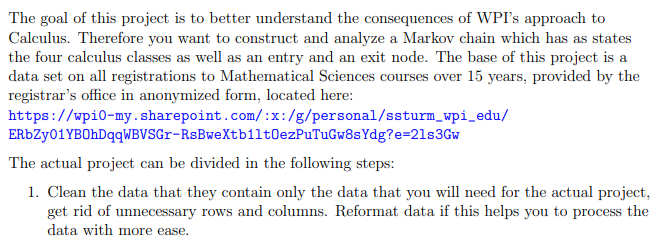

In [ ]:
fullFile = pd.ExcelFile("math_course_dataCleaned.xlsx")
print(fullFile.sheet_names)
parsedFile = fullFile.parse(fullFile.sheet_names[0])

['in']


In [ ]:
list(parsedFile.columns)

['PIDM_KEY', 'Semester', 'Term', 'Course Title', 'Course Number']

This file has been cleaned to only have the columns listed above and to only contain Calculus Course Data.  We also removed LAB and CONF associated with the course, but left the online versions and Professional Learning Community versions.  There are 40581 entries in the final spreadsheet.

In excel we split the semester column into semester only which had spring, fall and summer and year, which had the year.  Then we sorted by term.  Then semester only, then year, and finally PIDM_KEY which is the student ID.  Excel sorting preserved Semester and Term Sorting.  As you can see, the first student started in the fall of 2006 term A in Calculus III and went on to do Calculus IV the next term.  Then they exited the Calculus Sequence.

In [ ]:
parsedFile.head()

,PIDM_KEY,Semester,Term,Course Title,Course Number
0,30086,3Fall 2006,A,CALCULUS III,MA 1023
1,30086,3Fall 2006,B,CALCULUS IV,MA 1024
2,30094,2Summer 2007,E,CALCULUS II,MA 1022
3,30108,3Fall 2006,A,CALCULUS I,MA 1021
4,30108,3Fall 2006,B,CALCULUS II,MA 1022


In [ ]:
parsedFile.tail()

,PIDM_KEY,Semester,Term,Course Title,Course Number
40576,961344,2Summer 2016,E2,CALCULUS II (ONLINE),MA 1022
40577,961351,2Summer 2016,E2,CALCULUS II (ONLINE),MA 1022
40578,961417,2Summer 2016,E2,CALCULUS II (ONLINE),MA 1022
40579,970449,1Spring 2017,C,CALCULUS II,MA 1022
40580,980412,1Spring 2017,D,CALCULUS IV,MA 1024


In [ ]:
parsedFile.iloc[3][0]

30108

In [ ]:
parsedFile[parsedFile.columns[0]][1] # student id

30086

In [ ]:
student=parsedFile['PIDM_KEY'].to_numpy()
courseNumber=parsedFile['Course Number'].to_numpy()
courseNumber

array(['MA 1023', 'MA 1024', 'MA 1022', ..., 'MA 1022', 'MA 1022',
       'MA 1024'], dtype=object)

In [ ]:
student

array([ 30086,  30086,  30094, ..., 961417, 970449, 980412])

In [ ]:
len(parsedFile.index)

40581

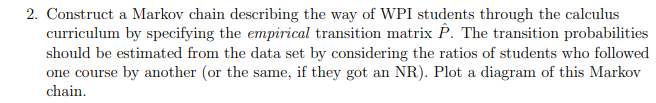

In [ ]:
states=[0,1,2,3,4,5] #states
calculusNames=['MA 1021','MA 1022', 'MA 1023', 'MA 1024']
pij=np.zeros((6,6))
ni=np.zeros(6)
numberOfDistinctStudents=0
numberOfEntries=len(parsedFile.index)
for entry_number in range(numberOfEntries-1): #need to stop before the last entry
  indx=0
  while courseNumber[entry_number]!=calculusNames[indx]:
    indx=indx+1
  istate1=indx+1 # places calculus I in state 1 and so forth
  ni[istate1]=ni[istate1]+1 #increasing the count of students taking istate1 calculus
  indx=0
  while courseNumber[entry_number+1]!=calculusNames[indx]:
    indx=indx+1
  istate2=indx+1 # places calculus I in state 1 and so forth
  if student[entry_number]==student[entry_number+1]: #checks that the next entry is still the same student
    pij[istate1][istate2]=pij[istate1][istate2]+1
  if (entry_number==0 or student[entry_number]!=student[entry_number-1]): #checks that this is different from prior student
    pij[0][istate1]=pij[0][istate1]+1 # adds one when istate1 is the first calculus course taken by the student
    numberOfDistinctStudents=numberOfDistinctStudents+1 #counts distinct students
  if student[entry_number]!=student[entry_number+1]: #checks that this is different from next student
    pij[istate1][5]=pij[istate1][5]+1 # adds one when istate1 is the last calculus course taken by the student
ni[istate2]=ni[istate2]+1 #since last one only showed up in istate2
pij[istate2][5]=pij[istate2][5]+1 #last entry is the last course someone took
#in case last course is the first and last someone took, checking to see if it is the first.
if (student[numberOfEntries-1]!=student[numberOfEntries-2]): #checks that this is different from prior student
  pij[0][istate1]=pij[0][istate1]+1 # adds one when istate1 is the first calculus course taken by the student
  numberOfDistinctStudents=numberOfDistinctStudents+1 #counts distinct students
  print("Got Here")
for i in range(1,5):
  pij[0][i]=pij[0][i]/numberOfDistinctStudents
  pij[i][5]=pij[i][5]/ni[i]
  for j in range(1,5):
    pij[i][j]=pij[i][j]/ni[i] # number of studends taking i calculus and directly after j calculus divided by number of students taking i calculus

print("number of students taking ith calculus")
print(ni)

print("probability of students taking calculus i (row) directly followed by calculus j(column)")
print(np.array_str(pij,precision=3))

print("Checking that the sum of probabilities of starting at node i and going to any other node is 1 for all but node 5 is terminal.")
print(np.sum(pij,axis=1)) #rows
print("Now summing the probability of ending in site i.  This should be zero for the entry node 0.\nNote, however, that we normalize only for the forward process not the backwards one.")
print(np.sum(pij,axis=0)) #columns

print(numberOfDistinctStudents)

Got Here
number of students taking ith calculus
[    0.  5946.  8665. 12710. 13260.     0.]
probability of students taking calculus i (row) directly followed by calculus j(column)
[[0.    0.347 0.184 0.358 0.11  0.   ]
 [0.    0.076 0.837 0.013 0.004 0.07 ]
 [0.    0.02  0.094 0.756 0.013 0.117]
 [0.    0.011 0.01  0.051 0.852 0.077]
 [0.    0.013 0.007 0.02  0.053 0.906]
 [0.    0.    0.    0.    0.    0.   ]]
Checking that the sum of probabilities of starting at node i and going to any other node is 1 for all but node 5 is terminal.
[1. 1. 1. 1. 1. 0.]
Now summing the probability of ending in site i.  This should be zero for the entry node 0.
Note, however, that we normalize only for the forward process not the backwards one.
[0.         0.46730244 1.13190132 1.19859003 1.03260024 1.16960598]
14416



1.  Checked the number of students starting in the ith calculus in excel and those values are correct.
2.   For the matrix, it seems students only go forward not backwards. Spreadsheet seems to confirm this.
3. The sum of rows is the probability of starting at site i and going to all the others and is 1 for all but the last row which is for the terminal node 5.   That makes sense as there is no way to leave the terminal node.
4. The sum of the entries in a column is the sum of probabilities of going to state j.  It's 0 for j=0 as 0 is a entry node.  The rest don't add up to one either because of how we are defining the probabilities.  

$P_{0,i}={n_{i first}\over n_{total}}$ where $n_{i first}$ is the number of students taking calculus i first and $n_{total}$ is the total number of students.

$P_{i,5}={n_{i last} \over n_i}$ where $n_{i}$ is the number of students taking calculus i last and $n_{i}$ is the total number of students taking calculus i.

$P_{i,j}={n_{i,j} \over n_i}$ for i and j ={1,2,3,4} where $n_{i,j}$ is the number of students taking calculus i followed immediately after taking calculus j. Notice that this is divided by the total number of students taking calculus i.  This makes sense for the rows to add up to 1 but is not right if we wanted the columns to add up to 1.  In that case the divisor would need to be the number of students taking calculus j since the sum of the columns is the probability of ending in node j.  I think this is okay as we are focused on the forward process.


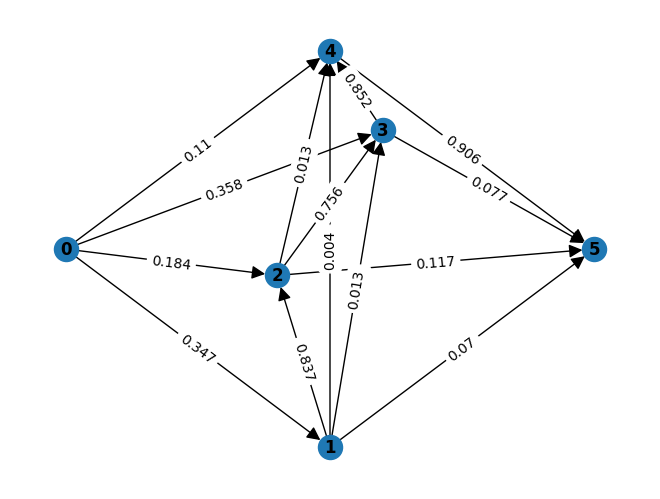

In [ ]:
#making picture of graph https://networkx.org/documentation/stable/tutorial.html
#CalculusGraph.clear() #only needed when redoing it
CalculusGraph = nx.DiGraph()
#adding nodes
CalculusGraph.add_node(0,pos=(0,2.5))
xposition = [1, 0.8, 1.2, 1]
yposition = [1, 2.3, 3.4, 4]
for i in range(1,5):
  CalculusGraph.add_node(i,pos=(xposition[i-1],yposition[i-1]))
CalculusGraph.add_node(5,pos=(2,2.5))
#adding edges
#0 (entry) connects to calculus 1-4
# calculus 1-4 connects to 5 (exit)
for i in range(1,5):
  CalculusGraph.add_weighted_edges_from([(0,i,round(pij[0][i],3)),(i,5,round(pij[i][5],3))])
#based on the data each calculus connects to the ones after it and itself but not the ones prior immediatelly after
for i in range(1,5):
  for j in range(i+1,5):#does not include self loops
    CalculusGraph.add_weighted_edges_from([(i,j,round(pij[i][j],3))])
pos=nx.get_node_attributes(CalculusGraph,'pos')
labels = nx.get_edge_attributes(CalculusGraph,'weight')
nx.draw(CalculusGraph,pos,with_labels=True, font_weight='bold',arrowsize=20)
nx.draw_networkx_edge_labels(CalculusGraph,pos,edge_labels=labels)
plt.show()

In the above graph the arrows and numberrs ar porbablities of going from a lower level Calculus to higher level Calculus.

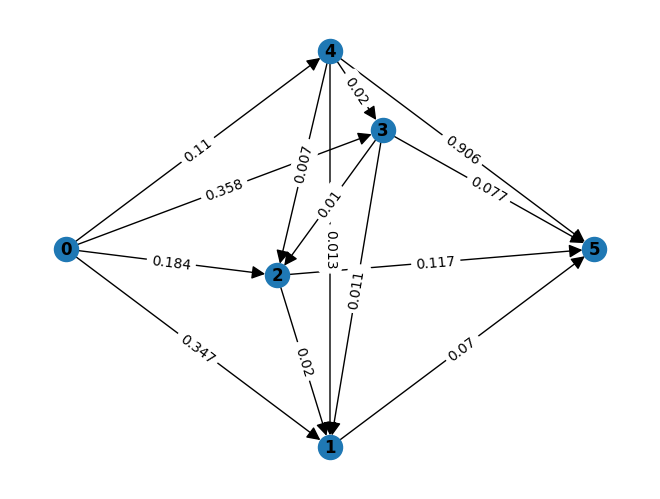

In [ ]:
#making picture of graph https://networkx.org/documentation/stable/tutorial.html
CalculusGraph.clear() #only needed when redoing it
CalculusGraph = nx.DiGraph()
#adding nodes
CalculusGraph.add_node(0,pos=(0,2.5))
xposition = [1, 0.8, 1.2, 1]
yposition = [1, 2.3, 3.4, 4]
for i in range(1,5):
  CalculusGraph.add_node(i,pos=(xposition[i-1],yposition[i-1]))
CalculusGraph.add_node(5,pos=(2,2.5))
#adding edges
#0 (entry) connects to calculus 1-4
# calculus 1-4 connects to 5 (exit)
for i in range(1,5):
  CalculusGraph.add_weighted_edges_from([(0,i,round(pij[0][i],3)),(i,5,round(pij[i][5],3))])
#based on the data each calculus connects to the ones after it and itself but not the ones prior immediatelly after
for i in range(1,5):
  for j in range(1,i):#does not include self loops
    CalculusGraph.add_weighted_edges_from([(i,j,round(pij[i][j],3))])
pos=nx.get_node_attributes(CalculusGraph,'pos')
labels = nx.get_edge_attributes(CalculusGraph,'weight')
nx.draw(CalculusGraph,pos,with_labels=True, font_weight='bold',arrowsize=20)
nx.draw_networkx_edge_labels(CalculusGraph,pos,edge_labels=labels)
plt.show()

In the above graph the arrows and numberrs ar probablities of going from a higher level Calculus to lower level Calculus.

These graphs are made seperately to avoid the probabilities and their lines from overlapping.

In [ ]:
print("probability of students taking calculus i (row) directly followed by calculus j(column)")
print(np.array_str(pij,precision=3))
print("Checking that the sum of probabilities of starting at node i and going to any other node is 1 for all but node 5 is terminal.")
print(np.sum(pij,axis=1)) #rows

probability of students taking calculus i (row) directly followed by calculus j(column)
[[0.    0.347 0.184 0.358 0.11  0.   ]
 [0.    0.076 0.837 0.013 0.004 0.07 ]
 [0.    0.02  0.094 0.756 0.013 0.117]
 [0.    0.011 0.01  0.051 0.852 0.077]
 [0.    0.013 0.007 0.02  0.053 0.906]
 [0.    0.    0.    0.    0.    0.   ]]
Checking that the sum of probabilities of starting at node i and going to any other node is 1 for all but node 5 is terminal.
[1. 1. 1. 1. 1. 0.]


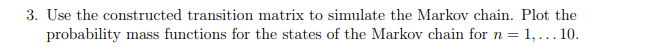

In [ ]:
P = pij

cumulant = np.zeros((6, 6))

for i in range(6):
  probabilitySum = 0
  for j in range(6):
    probabilitySum += P[i][j]
    cumulant[i][j] = probabilitySum
print(cumulant)

[[0.         0.34718368 0.53135405 0.88970588 1.         1.        ]
 [0.         0.07568113 0.91237807 0.92532795 0.92970064 1.        ]
 [0.         0.02008078 0.11379111 0.87005193 0.88320831 1.        ]
 [0.         0.01085759 0.02124312 0.0718332  0.92336743 1.        ]
 [0.         0.01349925 0.02043741 0.04087481 0.09411765 1.        ]
 [0.         0.         0.         0.         0.         0.        ]]


1 Steps
Probability Mass Function
[1. 0. 0. 0. 0. 0.]
1.0
2 Steps
Probability Mass Function
[0.5    0.17   0.0875 0.1915 0.051  0.    ]
1.0
3 Steps
Probability Mass Function
[0.33333333 0.13533333 0.17033333 0.16633333 0.139      0.05566667]
1.0
4 Steps
Probability Mass Function
[0.2621232  0.10275229 0.14862385 0.20209699 0.15334207 0.1310616 ]
1.0
5 Steps
Probability Mass Function
[0.23255814 0.09581395 0.12790698 0.19209302 0.18953488 0.16209302]
1.0
6 Steps
Probability Mass Function
[0.21486893 0.09282338 0.13300387 0.18070477 0.18972927 0.18886979]
1.0
7 Steps
Probability Mass Function
[0.2093364  0.08582793 0.13020724 0.18589073 0.1909148  0.1978229 ]
1.0
8 Steps
Probability Mass Function
[0.20959966 0.08698386 0.12932299 0.17962691 0.1890589  0.20540767]
1.0
9 Steps
Probability Mass Function
[0.20563438 0.09006786 0.12893276 0.18280897 0.18836109 0.20419494]
1.0
10 Steps
Probability Mass Function
[0.20695364 0.08774834 0.1281043  0.18067053 0.1901904  0.20633278]
1.0


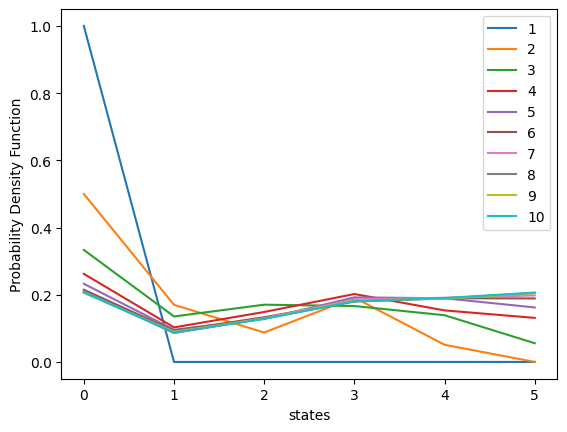

In [ ]:
#code above but without storing for longer paths
#instead of storing paths, will store how often each state is visited
stepOptions = [1, 2, 3, 4 ,5 , 6, 7, 8 ,9, 10]
numofPaths = 1000  # This number of paths ensures stability in the probability mass function.
for steps in stepOptions:
  counter=0
  probabilityMassFunction = np.zeros(6) # a spot for each state
  print(str(steps) + " Steps")
  for ipath in range(numofPaths): #looping over 10 paths
    #algorithm from p. 104 of Explortions in Monte Carlo Methods
    i=0 #setting the 0th state in path to be 0
    probabilityMassFunction[i]+=1
    counter=counter+1
    #decided not to include the starting point in the density function since the choice is forced.
    for nstep in range(1,steps): # looping over steps in each path starting at 1 since 0 is already taken care of
      roller = random.uniform(0, 1)
      j=0
      while cumulant[i][j]==0.:
        j=j+1
      while cumulant[i][j]<roller or cumulant[i][j] == 0:
        j=j+1
      # j is the new state
      i=j
      probabilityMassFunction[i]+=1
      counter=counter+1
      if i == 5:
        break
  for k in range(6):
    probabilityMassFunction[k] = probabilityMassFunction[k]/(counter)
  print("Probability Mass Function")
  print(probabilityMassFunction)
  print(sum(probabilityMassFunction))
  plt.plot(states, probabilityMassFunction)
  plt.legend(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
  plt.xlabel("states")
  plt.ylabel("Probability Density Function")

In [ ]:
print("probability of students taking calculus i (row) directly followed by calculus j(column)")
print(np.array_str(pij,precision=3))
print("Checking that the sum of probabilities of starting at node i and going to any other node is 1 for all but node 5 is terminal.")
print(np.sum(pij,axis=1)) #rows

probability of students taking calculus i (row) directly followed by calculus j(column)
[[0.    0.347 0.184 0.358 0.11  0.   ]
 [0.    0.076 0.837 0.013 0.004 0.07 ]
 [0.    0.02  0.094 0.756 0.013 0.117]
 [0.    0.011 0.01  0.051 0.852 0.077]
 [0.    0.013 0.007 0.02  0.053 0.906]
 [0.    0.    0.    0.    0.    0.   ]]
Checking that the sum of probabilities of starting at node i and going to any other node is 1 for all but node 5 is terminal.
[1. 1. 1. 1. 1. 0.]


The probability density function stabalizes when I get statistics from 1000 different trajectories.

The plot above has different colors for the different length trajectories.  It should be noted that when state 5 is reached, the trajectory ends, so the probability density function is not really the length of the trajectory that is indicated.  Line 1 only uses 1 step, so the student has just entered wpi, so only state 0 is possible.  Line 2 has 2 steps.  The student has entered wpi and taken a calculus course.  Notice that the values for that line are similar to the first row of the probability transition matrix, that is the probabilities that a student goes from state 0 to state i.  For line 3 and beyond, the probability mass functions tend to flatten after a low point at Calculus 1.

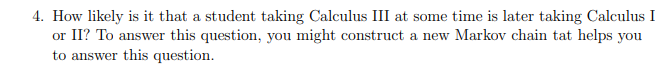

In [ ]:
P32 = 0
P31 = 1

for entry_number in range(numberOfEntries):  #looping through all entries

  if courseNumber[entry_number] == calculusNames[2]:  #check if calculus III
    jndx = entry_number + 1
    if  jndx >= numberOfEntries:
      break
    while student[entry_number] == student[jndx]:  #considering next sources of same student
      if courseNumber[jndx] == calculusNames[1]: #calculus II
        P32 += 1
      if courseNumber[jndx] == calculusNames[0]:  #calculus I
        P31 += 1
      jndx += 1
      if jndx >= numberOfEntries:
        break

P32 = P32/ni[3]
P31 = P31/ni[3]

print("the probability that someone takes Calculus I or II any time after Calculus III")
print(P32 + P31)

the probability that someone takes Calculus I or II any time after Calculus III
0.06939417781274587


Based on our earlier Markov Matrix, the probability of going from Calculus III to Calculus I or II is only about 2%.  However, the probability that Calculus I or II is taken at any poin after Calculus III is much larger (about 7%).

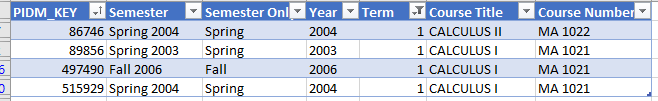

The first problematic entry (used numbers for terms instead of letters) had the student only take one course so this didn't cause an issue.  The second problematic entry took the same course twice in different years so it didn't cause any issues for my data handling either.  The third problematic entry took calculus I three times in different years and then took Calculus II and then II.  Because they were taken during different years this didn't cause any data handling issues.  The last problematic entry had the student take Calculus I(PLC), II(PLC), and Calculus I, II, and III, then I, IV, and IV.  Despite the problematic entries the order seems to work just as well.

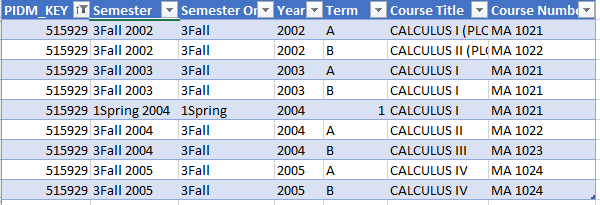

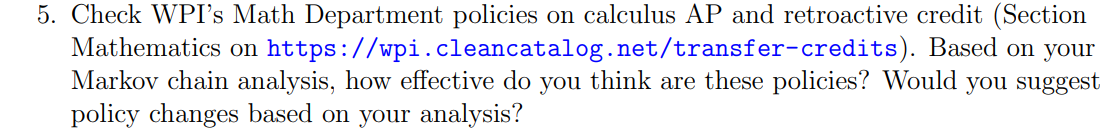

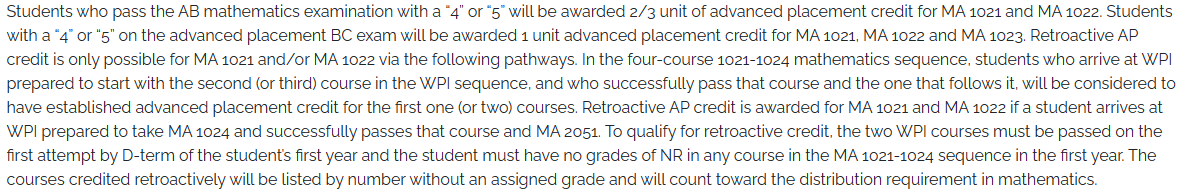

The policy says that there are two placement tests.  They can start at Calc III and go to calc IV since they got credit for Calc I and II, or they can Start at Calc IV since they got credit for Calc I, II, and III.  On first entering the system, most people start with Calc I or III (about 70% or 35% each).  Most people then go through calculus in order, I, then II, then III, and finally IV or III then IV before permanently exiting the system.  Very few go backwards.  The small percentage of people who decide they need to skip courses or go back to previouse classes is a sign that the system works well in placing people correctly.  About 12% of the students who took Calculus II left Calculus entirely.  This would not be surprising in most schools, but at an engineering school, this may represent a problem that needs to addressed.  A study of where these students are going, i.e.  moving on to another type of mathematics or leaving mathematics entirely would be useful.

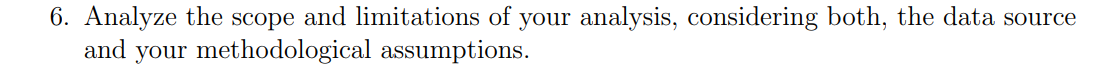

The scope of our analysis is the students entering and leaving the calculus sequence.

Most of the limitation of the analysis come from the limited scope.  For eample.  Our analysis did not consider where the student went after leaving the Calculus Sequence.  They may have gone to other mathematics which better suited thier career goals or left mathematics entirely.  It is difficult to analyze the success of the placement when we the result of the test is not known.  Students may have gone against the suggestion of the placement test.  The analysis also did not consider if students took breaks between Calculus classes.
Students seem to perform much Better in Calc IV. This could be because they took break from the Calculus circuit and returned better prepared.  The population of the honors Mathematics Sequence, 1033 and 1034 was not considered nor were the courses in a students major which require or recommend courses in the calculus sequence.